## k-Means is MF

In the previous section, we introduced the k-means algorithm and saw how it minimizes an objective that captures the within-cluster scatter. But this raises several natural questions:

- **How good is this algorithm?**
- **Does it always converge?**
- **Is it just a heuristic, or can we derive more general guarantees?**

To answer these, we now take a step back and view k-means through the lens of the more general and powerful concept of matrix factorization. This perspective not only deepens our understanding of how k-means works, but also connects it to a broader class of unsupervised learning methods, such as truncated SVD and PCA.

### Reformulating k-means as MF

#### Representing Cluster Assignments as a Binary Matrix

We begin by formalizing the cluster assignments using a **binary indicator matrix**.

Let $Y \in \{0,1\}^{n \times r}$ be a matrix such that:

$$
Y_{is} = 
\begin{cases}
1 & \text{if point } i \text{ is assigned to cluster } \mathcal{C}_s, \\
0 & \text{otherwise.}
\end{cases}
$$

This matrix has exactly one non-zero entry per row, corresponding to each point being assigned to exactly one cluster. That is:

$$
|Y_{i\cdot}| = 1 \quad \text{for all } i \in \{1, \dots, n\}
$$

We denote by $ \mathbb{1}^{n \times r} $ the set of all such valid cluster indicator matrices:

$$
\mathbb{1}^{n \times r} = \left\{ Y \in \{0,1\}^{n \times r} \,\middle|\, |Y_{i\cdot}| = 1 \text{ for all } i \right\}
$$


#### The Centroid Matrix

Next, we derive the matrix of cluster centroids in terms of $Y $. Suppose we are given a data matrix $D \in \mathbb{R}^{n \times d}$, where each row $D_{i\cdot}$ represents a data point. The centroid of cluster $\mathcal{C}_s$ is the mean of all points assigned to it:

$$
X_{\cdot s} = \frac{1}{|\mathcal{C}_s|} \sum_{i \in \mathcal{C}_s} D_{i\cdot}^\top 
= \frac{1}{|Y_{\cdot s}|} \sum_{i=1}^n Y_{is} D_{i\cdot}^\top 
= \frac{1}{|Y_{\cdot s}|} D^\top Y_{\cdot s}
$$

We can collect all $r$ centroids into a single matrix $X \in \mathbb{R}^{d \times r}$, where each column $ X_{\cdot s}$ is the centroid of cluster $s$. In matrix form, this becomes:

\begin{align*}
    X &= D^\top Y 
    \begin{pmatrix}
    \frac{1}{\lvert Y_{\cdot 1}\rvert} & &\mathbf{0}\\
    &\ddots &\\
    \mathbf{0}& & \frac{1}{\lvert Y_{\cdot r}\rvert}
    \end{pmatrix} 
    = D^\top Y (Y^\top Y)^{-1}.
\end{align*}

This formula expresses the centroids as a matrix product of the data and the cluster assignments — revealing a key insight: k-means clustering can be seen as a matrix factorization problem.

#### The k-means objective as MF
````{prf:theorem} $k$-means MF objective
The $k$- means objective in Eq. {eq}`eq:k-means` is equivalent to
\begin{align*}
    \min_Y\ & RSS(X,Y) = \lVert D-YX^\top\rVert^2
    &\text{s.t. }Y\in\mathbb{1}^{n\times r},\\ 
    &&\quad X=D^\top Y (Y^\top Y)^{-1}
\end{align*}
````
````{toggle}
```{prf:proof}
The matrix $Y$ is a cluster-indicator matrix, indicating a partition of the $n$ data points into $r$ sets. For every data point with index $i\in\{1,\ldots,n\}$, there exists one cluster index $s_i$, such that $Y_{i s_i}=1$ and $Y_{i s}=0$ for $s\neq s_i$ (point $i$ is assigned to cluster $s_i$). Using this notation, the objective function in Eq. {eq}`eq:k-means_centr`, returning the distance of every point to its cluster centroid, is equal to
\begin{align*}
    {\color{magenta}\sum_{s=1}^r}\sum_{i\in{\color{magenta}\mathcal{C}_s}}\lVert D_{i\cdot}-{\color{magenta}X_{\cdot s}^\top}\rVert^2 
    &= \sum_{i=1}^n{\color{magenta}\sum_{s=1}^r Y_{is}} \lVert D_{i\cdot}-{\color{magenta}X_{\cdot s}^\top}\rVert^2 &\text{(use indicator matrix)}\nonumber\\
    &= \sum_{i=1}^n \lVert D_{i\cdot}-{\color{magenta}X_{\cdot {s_i}}^\top}\rVert^2&\text{(only $Y_{i s_i}=1$)}\nonumber\\ 
    &= \sum_{i=1}^n \left\lVert D_{i\cdot}-{\color{magenta}\sum_{s=1}^rY_{is}X_{\cdot s}^\top}\right\rVert^2&\text{(only $Y_{i s_i}=1$)}\nonumber\\
    &= \left\lVert D-{\color{magenta}\sum_{s=1}^rY_{\cdot s}X_{\cdot s}^\top}\right\rVert^2\label{eq:FroEuc}\\
    &= \lVert D-YX^\top\rVert^2 &\text{(outer product def. matrix product)}\nonumber.
\end{align*}
The third equation uses the composition of the squared Frobenius norm as a sum of the squared Euclidean vector norm over all rows.
```
````
The matrix factorization of k-means has a very specific structure. The left matrix $Y$ is binary and every row contains exactly one entry being equal to one, and all the others are zero. That means, we can sort the rows of a data matrix, such that all points in one cluster have consecutive indices. The resulting matrix $Y$ looks as the left matrix below, there is one block of ones (black) in the first column, representing the first cluster, and then follows a block of ones in the second row, representing the second cluster and so on. The right matrix $X^\top$ indicates the centroids as the rows, each centroid has here its own color. The data matrix is then approximated over these centroids, as displayed on the right. 

::::{grid}
:gutter: 1
:class-container: sd-d-flex-row, sd-align-major-center

:::{grid-item}
:child-align: center
:columns: auto
```{tikz}
\begin{tikzpicture}[baseline=-0.5ex, 
    style1/.style n args={3}{
    minimum width=#1,minimum height=#2,inner sep=0,align=center,fill=#3}
  ]
   \matrix [matrix of math nodes,nodes in empty cells,
  left delimiter=(,
  right delimiter=),ampersand replacement=\&] (y) {
 |[style1={5mm}{25mm}{black}]|\& \&  \\
 \&  |[style1={5mm}{15mm}{black}]| \&\\
 \&   \& |[style1={5mm}{10mm}{black}]|\\
};
\end{tikzpicture}
```
:::
:::{grid-item}
:child-align: center
:columns: auto
```{tikz}
\begin{tikzpicture}[baseline=-0.5ex,
    style1/.style 2 args={
  matrix of math nodes,
  every node/.append style={minimum width=#2,minimum height=#1,inner sep=0,align=center},
  nodes in empty cells,
  left delimiter=(,
  right delimiter=),ampersand replacement=\&}
  ]
   \matrix [style1={5mm}{5mm}] (n) {
 |[fill=blue, opacity=0.6]|\& |[fill=blue, opacity=0.8]| \& |[fill=blue, opacity=0.4]| \& |[fill=blue, opacity=0.6]| \& |[fill=blue, opacity=0.8]| \& |[fill=blue, opacity=0.4]|\\
 |[fill=magenta, opacity=0.2]|\& |[fill=magenta, opacity=0.5]| \& |[fill=magenta, opacity=0.2]|\& |[fill=magenta, opacity=0.8]|\& |[fill=magenta, opacity=0.7]|\& |[fill=magenta, opacity=0.8]|\\
 |[fill=orange, opacity=0.7]|\& |[fill=orange, opacity=0.4]| \& |[fill=orange, opacity=0.6]|\& |[fill=orange, opacity=0.9]|\& |[fill=orange, opacity=0.2]|\& |[fill=orange, opacity=0.9]|\\
};
\end{tikzpicture}
```
:::
:::{grid-item}
:child-align: center
:columns: auto
$=$
:::
:::{grid-item}
:child-align: center
:columns: auto    

```{tikz}
\begin{tikzpicture}[baseline=-0.5ex,
    style1/.style n args={3}{
    minimum width=#2,minimum height=#1,inner sep=0,align=center,fill=#3}
  ]
   \matrix [matrix of math nodes,nodes in empty cells,
  left delimiter=(,
  right delimiter=),ampersand replacement=\&] (y) {
  |[style1={25mm}{5mm}{blue}, opacity=0.6]|\& |[style1={25mm}{5mm}{blue}, opacity=0.8]| \& |[style1={25mm}{5mm}{blue}, opacity=0.4]| \& |[style1={25mm}{5mm}{blue}, opacity=0.6]| \& |[style1={25mm}{5mm}{blue}, opacity=0.8]| \& |[style1={25mm}{5mm}{blue}, opacity=0.4]|\\
  |[style1={15mm}{5mm}{magenta}, opacity=0.2]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.5]| \& |[style1={15mm}{5mm}{magenta}, opacity=0.2]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.8]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.7]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.8]|\\
  |[style1={10mm}{5mm}{orange}, opacity=0.7]|\& |[style1={10mm}{5mm}{orange}, opacity=0.4]| \& |[style1={10mm}{5mm}{orange}, opacity=0.6]|\& |[style1={10mm}{5mm}{orange}, opacity=0.9]|\& |[style1={10mm}{5mm}{orange}, opacity=0.2]|\& |[style1={10mm}{5mm}{orange}, opacity=0.9]|\\
};
\end{tikzpicture}
```
:::

::::
```{prf:theorem}
The k-means objective is nonconvex.
```
```{prf:proof}
If we consider the penalized version of the k-means objective (putting the constraints in the main objective), then we get the following objective:
\begin{align*}
    \min_Y\ & RSS(X,Y) = \lVert D-Y (Y^\top Y)^{-1}Y^\top D\rVert^2 + \mathbb{1}_{Y\in\mathbb{1}^{n\times r}}
\end{align*}
This objective has a local minimum for every feasible $Y$, and inbetween the feasible points the objective returns infinity.
```

````{prf:example} k-means matrix factorization for recommender systems
Since k-means is an instance of the low-rank matrix factorization universe, we can compare the factorization of k-means in the scope of the recommender example, that we used to motivate low-rank matrix factorizations. We compute a clustering of the neutral-rating imputed running example of the recommender systems section and obtain the following:
\begin{align*}
  \begin{pmatrix}
    5 & \mu & 1 & 1 \\
    \mu & 1 & 5 & \mu  \\\
    2 & 1 & 5 & 3 \\
    4 & \mu & 4 & 2\\
    5 & 5 & \mu & 1 \\
    \mu & 1 & 5 & 3 \\
  \end{pmatrix}
  &\approx
  \begin{pmatrix}
    1 & 0\\
    0 & 1\\
    0 & 1\\
    1 & 0\\
    1 & 0\\
    0 & 1\\
  \end{pmatrix}
  \begin{pmatrix}
    4.7 & 3.7 & 2.7 & 1.3\\
    2.3 & 1.0 & 5.0 & 3.0\\
  \end{pmatrix}
\end{align*}
The movie patterns are now given by the centroids, and every user belongs to exactly one movie pattern, indicates by the user pattern matrix $Y$. For example, the first user is assigned to movie pattern 1:
\begin{align*}
    \begin{pmatrix}
        5 & \mu & 1 & 1 
    \end{pmatrix}
    \approx&
    1\cdot 
    \begin{pmatrix}
        4.7 & 3.7 & 2.7 & 1.3
    \end{pmatrix}
    +0\cdot
    \begin{pmatrix}
        2.3 & 1.0 & 5.0 & 3.0
    \end{pmatrix}    
\end{align*}
The k-means assignment scheme allows for a clear interpretation of the movie patterns. Each pattern indicates one user preference scheme and can hence be analyzed by itself, and not in dependence to the coefficients in $Y$ and the other movie patterns. The example above indicates two behaviours: users that like movie one and two but not so much the other movies, and users that like movie 3.       

The clustering above is obtained via sklearn:

    M = [[5,3,1,1],[2,1,5,3],[2,1,5,3],[4,3,4,2],[5,5,3,1],[3,1,5,3]]
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(M)
The clustering can be obtained by `kmeans.labels_` and `kmeans.cluster_centers_`. Sklearn labels are nominally encoded, that is, the label indicates the assigned cluster by a number. Since we have a nonconvex problem, it's not guaranteed that you get the exact same clustering solution as above. As an exercise, you can try the code above and get the matrix factorization that is indicated by the clustering. 
````

### Convergence Analysis
Ok, so $k$-means is an instance of the rank-$r$ matrix factorization problem. Can we also characterize the global minimizers of $k$-means like we did it for the rank-r matrix factorization problem with truncated SVD? Unfortunately not. However, we can characterize the global minimizers of the objective when we fix one of the factor matrices.
````{prf:theorem} Centroids as minimizers
Given $D\in\mathbb{R}^{n\times d}$ and $Y\in\mathbb{1}^{n\times r}$, the minimizer of the optimization problem 
\begin{align}
    \min_X& \lVert D-YX^\top \rVert^2 & \text{s.t. } X\in\mathbb{R}^{d\times r}\label{eq:minX}
\end{align}
is given by the centroid matrix $X=D^\top Y(Y^\top Y)^{-1}$.
````
````{toggle}
```{prf:proof} 
Show that the objective in Eq.~\eqref{eq:minX} is  convex. The minimizer is then given by the stationary point:
\begin{align}
    \nabla_X \lVert D-YX^\top\rVert^2 = -2(D-YX^\top)^\top Y &=0\\
    \Leftrightarrow D^\top Y(Y^\top Y)^{-1} &= X 
\end{align}
```
````

````{prf:theorem} Nearest centroid assignments as minimizers
Given $D\in\mathbb{R}^{n\times d}$ and $X\in\mathbb{R}^{d\times r}$, the minimizer of the optimization problem 
\begin{align}
    \min_Y& \lVert D-YX^\top \rVert^2 & \text{s.t. } Y\in\mathbb{1}^{n\times r}
\end{align}
is the matrix, assigning every point to the nearest centroid:
$$Y_{is}=
\begin{cases}
1& \text{if } s=\argmin_{1\leq t\leq r}\left\{\|X_{\cdot t}-D_{i\cdot}\|^2\right\}\\
0& \text{otherwise}
\end{cases}$$
````
````{toggle}
```{prf:proof} 
    Follows from the $k$-means centroid objective:
    $$\min_Y\sum_{s=1}^r\sum_{i=1}^n Y_{is}\lVert D_{i\cdot} - X_{\cdot s}^\top\rVert^2.$$
```
````   
```{prf:corollary}
Lloyds' algorithm performs an alternating minimization (also called **block coordinate descent**):
\begin{align}
    X_{k+1} & \leftarrow \argmin_{X\in\mathbb{R}^{d\times r}}\lVert D-Y_kX^\top\rVert^2\\
    Y_{k+1} &\leftarrow \argmin_{Y\in \mathbb{1}^{n\times r}}\lVert D-YX_{k+1}^\top\rVert^2
\end{align}
```
The sequence $\{(X_k,Y_k)\}$ converges, since we decrease the objective function value in every step:
$$RSS(X_0,Y_0)>RSS(X_1,Y_1)>RSS(X_2,Y_2)>\ldots \geq 0 .$$
````{prf:theorem} Equivalent $k$-means objectives
The following objectives are equivalent
\begin{align}
&\min_{Y}\ \sum_{s=1}^r\sum_{i=1}^nY_{is}\|D_{i\cdot}-X_{\cdot s}^\top\|^2 &\text{ s.t. } X\in\mathbb{R}^{d\times r}, Y\in\mathbb{1}^{n\times r}\\ 
&\min_{Y}\ \|D-YX^\top\|^2 &\text{ s.t. } X= D^\top Y(Y^\top Y)^{-1}, Y\in\mathbb{1}^{n\times r} \\
&\min_{Y,X}\ \|D-YX^\top\|^2 &\text{ s.t. }  X\in\mathbb{R}^{d\times r},Y\in\mathbb{1}^{n\times r} 
\end{align}
````

## Implementation

In [1]:
import numpy as np
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)
def getY(labels):
    Y = np.zeros((len(labels), max(labels)+1))
    for i in range(0, len(labels)):
        Y[i, labels[i]] = 1
    return Y

In [22]:
def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes
def update_assignment(D,X):
    dist = np.sum(D**2,1).reshape(-1,1)  - 2* D@X + np.sum(X**2,0)
    labels = np.argmin(dist,1)
    return getY(labels)
def kmeans(D,r, X_init, t_max=10000):
    rss_old,t = 0,0
    X = X_init
    Y = update_assignment(D,X)
    #Looping as long as the clustering still changes
    while rss_old != RSS(D,X,Y) and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    return X,Y

In [39]:
from sklearn import datasets
n=500
r =3
epsilon = 0.1
D, labels = datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 0.5, epsilon + 1.25, epsilon + 0.25],random_state=7)

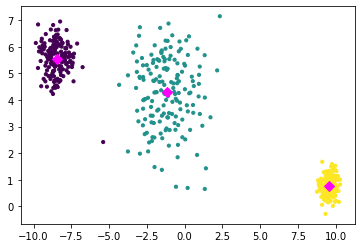

In [40]:
X_init = np.array([[-4,1,0.5],[0,-4,1.5]])# inital centroids
X,Y = kmeans(D,r,X_init)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(D[:, 0], D[:, 1], c=np.nonzero(Y)[1], s=10)
plt.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')
plt.show()

## Initialization
The $k$-means problem is NP-hard, while SVD is polynomially solvable. The simple addition of binary constraints changes the complexity of the problem a lot! Although Lloyds algorithm follows a sound optimization scheme, we can observe that the k-means clustering is complex from its sensitivity to the initialization.

In [35]:
%matplotlib inline
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import HTML
def animate(i):
    global X,D,Y
    ax.cla()
    if i==0: #initialize
        ax.scatter(D[:, 0], D[:, 1], s=10)
        ax.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')  
    elif i%2==1: # update cluster assignments
        dist = np.sum(D**2,1).reshape(-1,1)  - 2* D@X + np.sum(X**2,0)
        closest_centroid = np.argmin(dist,1)
        Y = getY(closest_centroid)
        ax.scatter(D[:, 0], D[:, 1], c=closest_centroid, s=10)
        ax.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')
    else: # update centroids
        _,closest_centroid = np.nonzero(Y)
        ax.scatter(D[:, 0], D[:, 1], c=closest_centroid, s=10)
        X = update_centroid(D,Y)
        ax.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')
    return

In [36]:
n=500
r =3
epsilon = 0.1
D, labels = datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 0.5, epsilon + 1.25, epsilon + 0.25],random_state=1)

In [37]:
fig = plt.figure()
ax = plt.axes()
X = np.array([[-4,1,0.5],[0,-4,1.5]])# inital centroids
Y=0
anim = animation.FuncAnimation(fig, animate, frames=8, interval=200, blit=False)
plt.close()
HTML(anim.to_jshtml())

In [38]:
fig = plt.figure()
ax = plt.axes()
X = np.random.rand(2,r)*10# inital centroids
Y=0
anim = animation.FuncAnimation(fig, animate, frames=8, interval=200, blit=False)
plt.close()
HTML(anim.to_jshtml())